In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\reach\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
#Importing the data in data frame
df = pd.read_excel (r'C:\Users\reach\Dropbox\PC\Desktop\Zip_Interview\orders.xlsx')
print (df)

      order_id customer_id     merchant_id  order_amount  \
0       42C39B      9D74A0          6881F9        147.20   
1       A19AC4      2629AB          C37828         69.95   
2       381AFF      793FE0  252600000000.0         45.00   
3       3184A3      22C696          24FBAF        164.00   
4     237711.0      D4E94A          6F498E         69.17   
...        ...         ...             ...           ...   
9995    17CAD0      A00DCD          26ECA2         63.66   
9996    BAD8F0      8F5B50          9C0B17         83.89   
9997    70DEB3      BC35EC        268696.0         95.25   
9998   62754.0    476671.0          C37828         79.95   
9999    EFF7C1      EFC4D8          3B88C5         15.50   

         checkout_started_at credit_decision_started_at  \
0    2018-10-03 14:26:18.497    2018-10-03 14:26:18.997   
1    2018-09-21 16:55:03.443    2018-09-21 16:55:05.100   
2    2018-09-15 13:41:46.103    2018-09-15 13:41:47.197   
3    2018-10-10 00:59:25.793    2018-10-10 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_id                    10000 non-null  object        
 1   customer_id                 10000 non-null  object        
 2   merchant_id                 10000 non-null  object        
 3   order_amount                10000 non-null  float64       
 4   checkout_started_at         10000 non-null  datetime64[ns]
 5   credit_decision_started_at  10000 non-null  datetime64[ns]
 6   approved_for_installments   10000 non-null  bool          
 7   customer_credit_score       10000 non-null  float64       
 8   customer_age                10000 non-null  float64       
 9   customer_billing_zip        9989 non-null   object        
 10  customer_shipping_zip       9977 non-null   object        
 11  paid_installment_1          9998 non-null   float64    

In [4]:
# Changing the data type
df['paid_installment_2'] = df['paid_installment_2'].astype(float)

In [5]:
# Deleting the Null Values
df1 = df.dropna()

In [6]:
print(df1.shape)
df1.head()

(9395, 15)


,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,True,626.0,26.0,95407.0,95407.0,1.0,1.0,1.0,1.0
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,True,603.0,20.0,85007.0,85007.0,1.0,1.0,1.0,1.0
2,381AFF,793FE0,252600000000.0,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,True,648.0,41.0,30305-2646,30305-2646,1.0,1.0,1.0,1.0
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,True,625.0,33.0,28562.0,28562.0,1.0,1.0,1.0,1.0
4,237711.0,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,True,438.0,18.0,92324.0,92324.0,1.0,1.0,1.0,1.0


In [7]:
# Display Statistics
df1.describe()

,order_amount,customer_credit_score,customer_age,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4
count,9395.000000,9395.000000,9395.000000,9395.0,9395.000000,9395.000000,9395.000000
mean,145.556299,613.268866,33.583608,1.0,0.977754,0.959872,0.940181
std,168.269974,93.022457,12.012152,0.0,0.147490,0.196269,0.237164
min,4.950000,1.000000,18.000000,1.0,0.000000,0.000000,0.000000
25%,63.945000,562.000000,24.000000,1.0,1.000000,1.000000,1.000000
50%,89.980000,611.000000,30.000000,1.0,1.000000,1.000000,1.000000
75%,154.810000,664.000000,41.000000,1.0,1.000000,1.000000,1.000000
max,1936.000000,836.000000,89.000000,1.0,1.000000,1.000000,1.000000


In [8]:
#Creating a function to create a new column defaulter
def defaulter (row):
    if row['paid_installment_2'] + row['paid_installment_3'] + row['paid_installment_4'] < 3 :
      return '1'
    return '0'

In [9]:
df1.apply (lambda row: defaulter(row), axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 9395, dtype: object

In [10]:
df1['defaulter'] = df1.apply (lambda row: defaulter(row), axis=1)

In [11]:
df1.head(100)

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,defaulter
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18.497,2018-10-03 14:26:18.997,True,626.0,26.0,95407.0,95407.0,1.0,1.0,1.0,1.0,0
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03.443,2018-09-21 16:55:05.100,True,603.0,20.0,85007.0,85007.0,1.0,1.0,1.0,1.0,0
2,381AFF,793FE0,252600000000.0,45.00,2018-09-15 13:41:46.103,2018-09-15 13:41:47.197,True,648.0,41.0,30305-2646,30305-2646,1.0,1.0,1.0,1.0,0
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:25.793,2018-10-10 00:59:26.123,True,625.0,33.0,28562.0,28562.0,1.0,1.0,1.0,1.0,0
4,237711.0,D4E94A,6F498E,69.17,2018-09-12 22:53:08.970,2018-09-12 22:53:10.923,True,438.0,18.0,92324.0,92324.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,B97976,1FF991,6F498E,64.78,2018-09-01 19:54:49.587,2018-09-01 19:54:50.620,True,611.0,19.0,48047.0,48047.0,1.0,1.0,1.0,1.0,0
101,345D7A,FFC3DD,6F498E,49.83,2018-10-11 04:43:02.773,2018-10-11 04:43:03.150,True,538.0,26.0,55411.0,55411.0,1.0,1.0,1.0,1.0,0
102,CE4161,E8B75A,0ADC71,77.71,2018-09-25 20:30:12.207,2018-09-25 20:30:14.410,True,583.0,57.0,94534.0,94534.0,1.0,1.0,1.0,1.0,0
103,0EBEEF,409F8F,3B88C5,56.25,2018-09-08 15:27:51.577,2018-09-08 15:27:53.203,True,665.0,20.0,53713.0,53713.0,1.0,1.0,1.0,1.0,0


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9395 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_id                    9395 non-null   object        
 1   customer_id                 9395 non-null   object        
 2   merchant_id                 9395 non-null   object        
 3   order_amount                9395 non-null   float64       
 4   checkout_started_at         9395 non-null   datetime64[ns]
 5   credit_decision_started_at  9395 non-null   datetime64[ns]
 6   approved_for_installments   9395 non-null   bool          
 7   customer_credit_score       9395 non-null   float64       
 8   customer_age                9395 non-null   float64       
 9   customer_billing_zip        9395 non-null   object        
 10  customer_shipping_zip       9395 non-null   object        
 11  paid_installment_1          9395 non-null   float64     

In [13]:
df3=df1

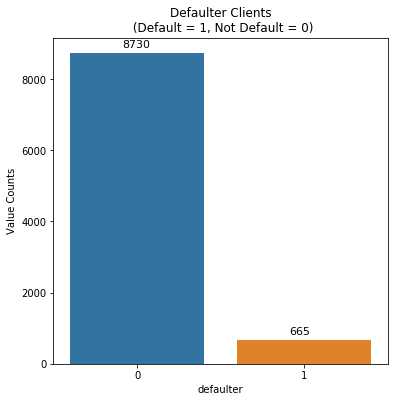

In [14]:
# No of defaulters
df2 = df1['defaulter'].value_counts()
plt.figure(figsize = (6,6))
plt.title('Defaulter Clients\n (Default = 1, Not Default = 0)')
sns.barplot(x = df2.index, y = df2.values)
for i, v in enumerate(df2.values):
    plt.text(i-.09 , v + 150, str(v),fontsize=11)
plt.xlabel('defaulter')
plt.ylabel('Value Counts')
plt.show()

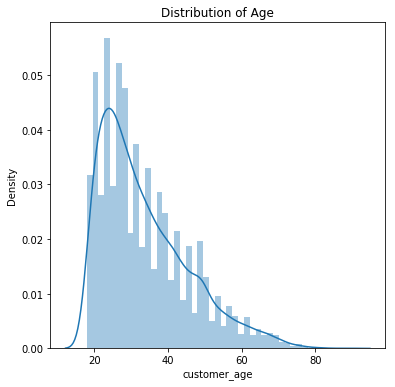

In [15]:
# Customers age distribution
plt.figure(figsize = (6,6))
plt.title('Distribution of Age')
sns.distplot(df1['customer_age'])
plt.show()

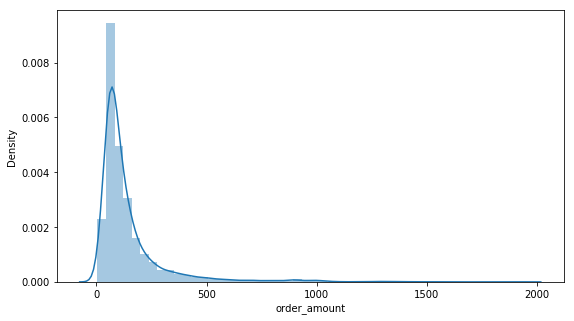

In [16]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df1.order_amount)
plt.show()

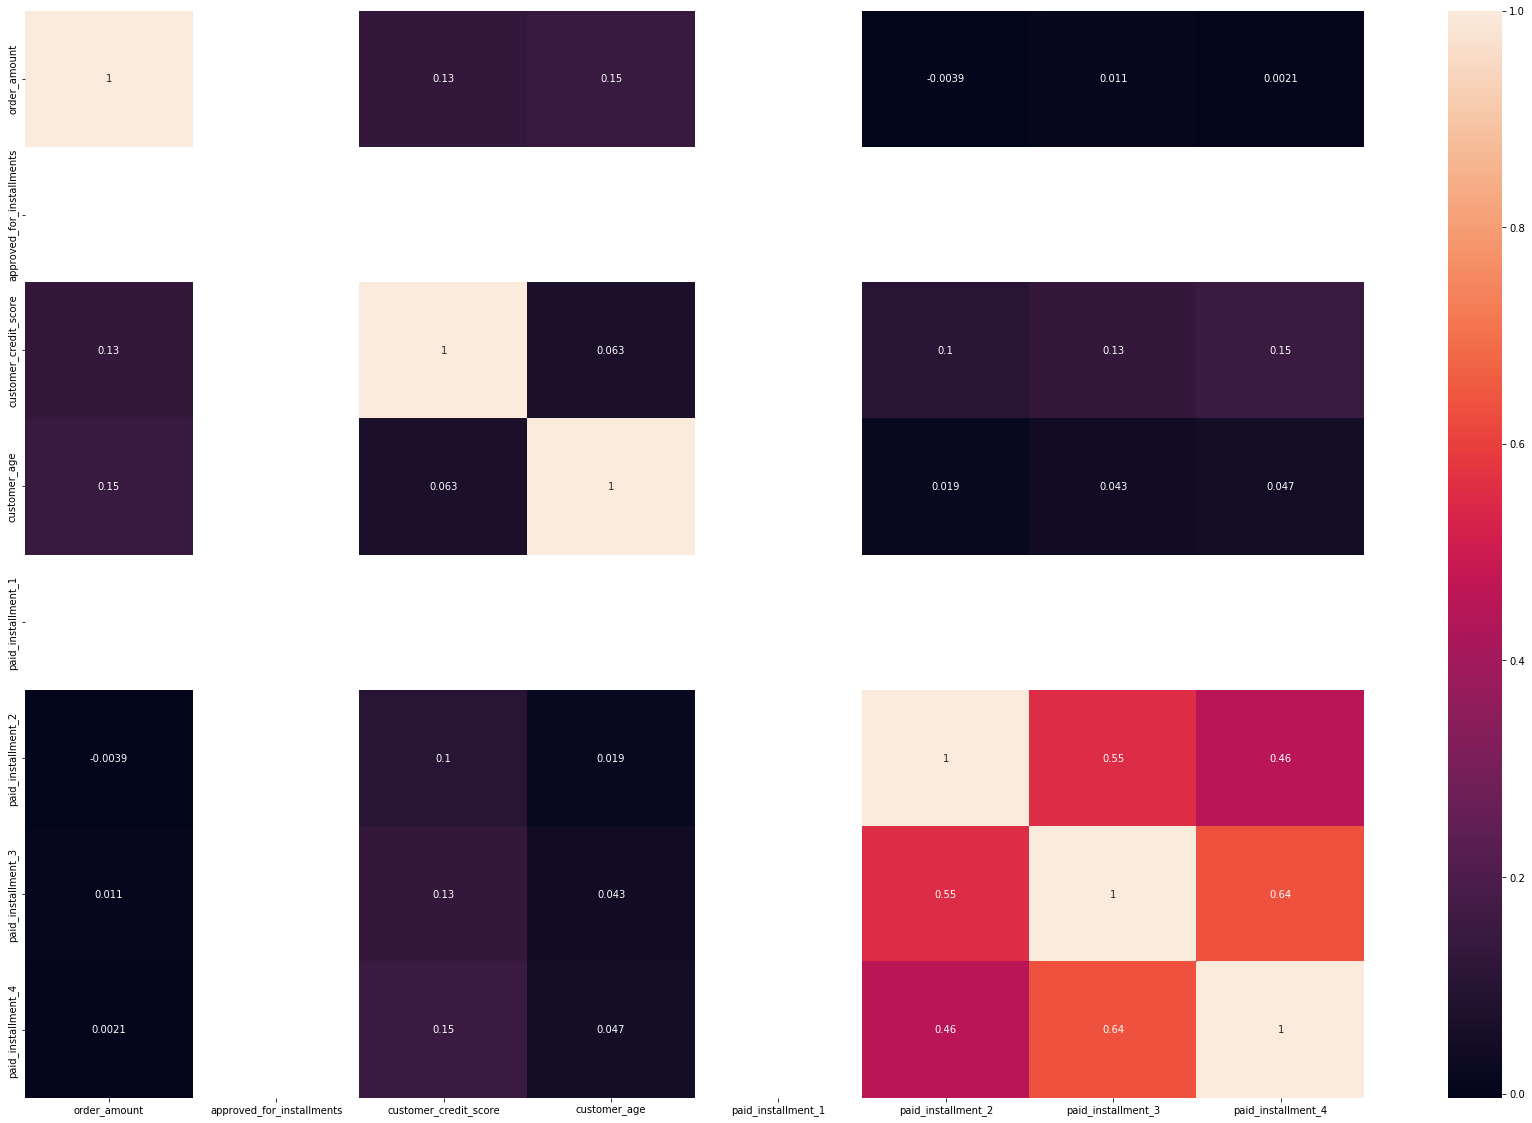

In [17]:
#correlation map
plt.subplots(figsize=(30,20))
sns.heatmap(df1.corr(), annot=True)
plt.show()

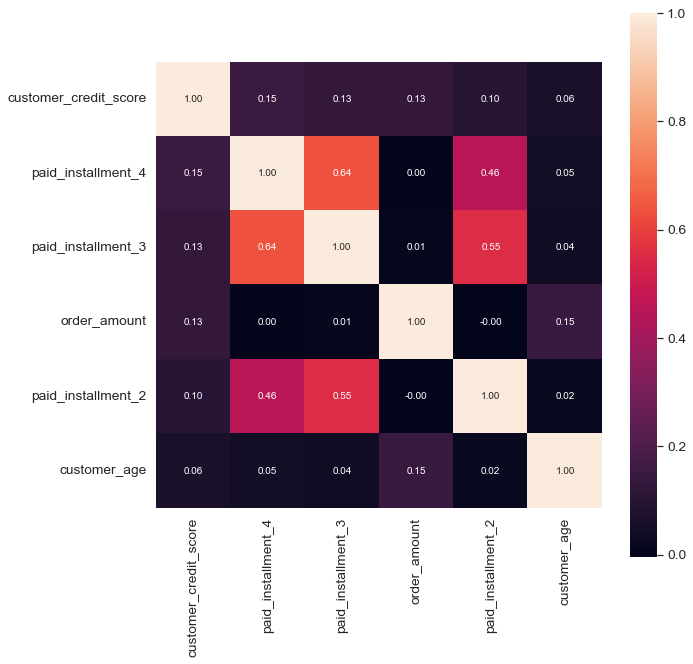

In [18]:
#correlation map
k = 6 
corrmat = df1.corr()
cols = corrmat.nlargest(k, 'customer_credit_score')['customer_credit_score'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

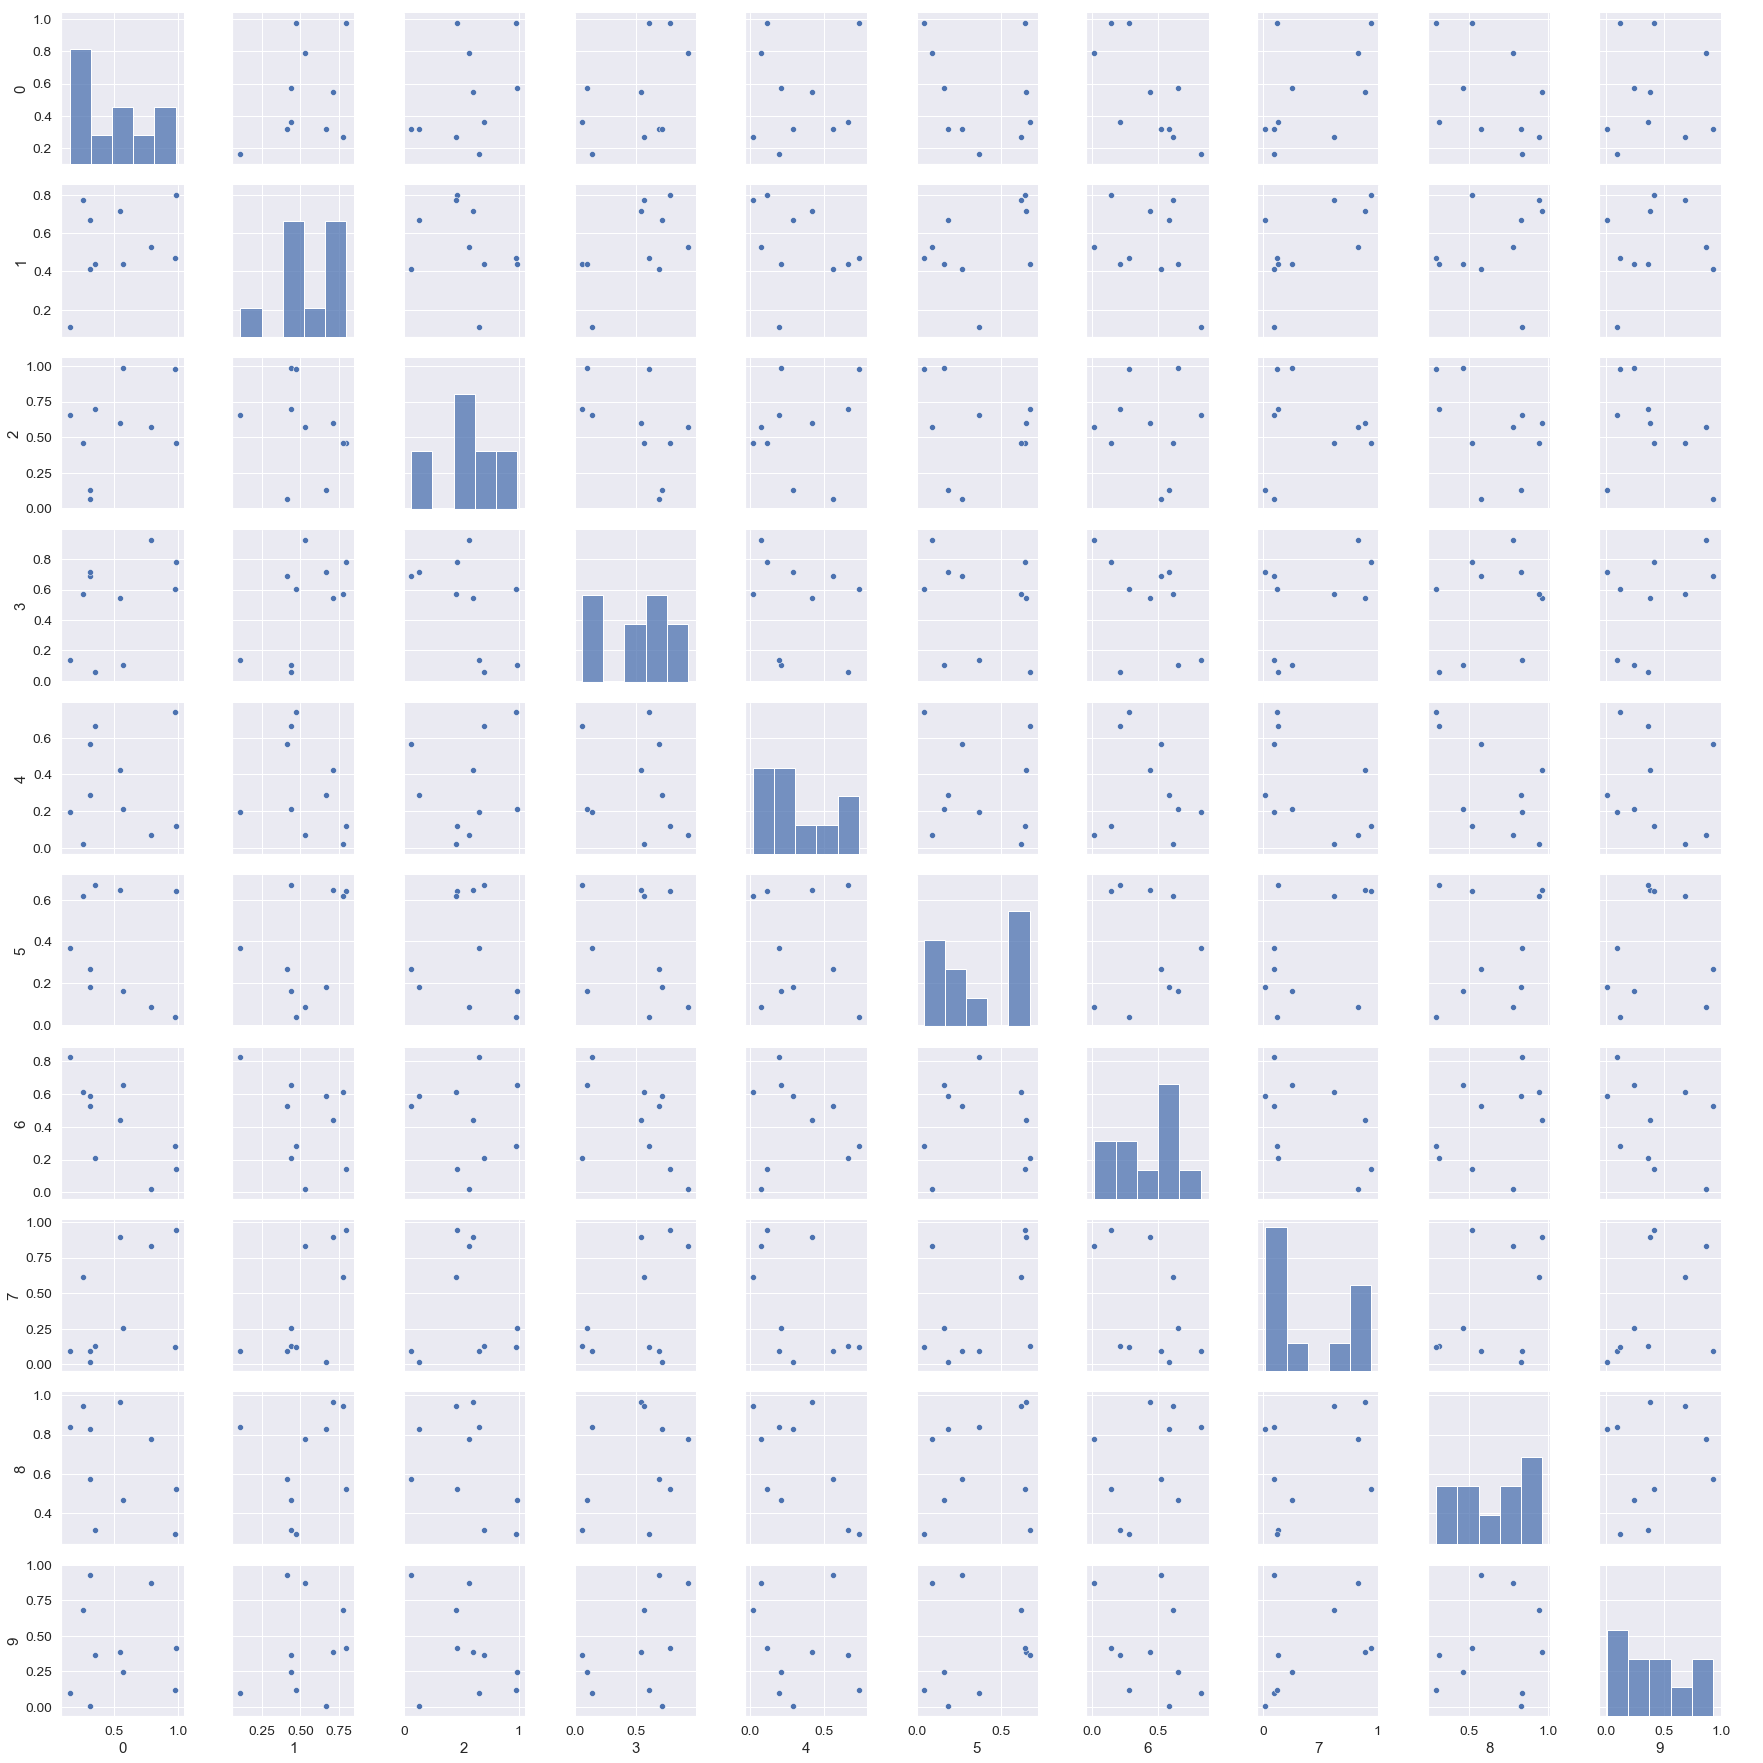

In [19]:
rs = np.random.RandomState(0)
df1 = pd.DataFrame(rs.rand(10, 10))
sns.pairplot(df1)

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9395 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_id                    9395 non-null   object        
 1   customer_id                 9395 non-null   object        
 2   merchant_id                 9395 non-null   object        
 3   order_amount                9395 non-null   float64       
 4   checkout_started_at         9395 non-null   datetime64[ns]
 5   credit_decision_started_at  9395 non-null   datetime64[ns]
 6   approved_for_installments   9395 non-null   bool          
 7   customer_credit_score       9395 non-null   float64       
 8   customer_age                9395 non-null   float64       
 9   customer_billing_zip        9395 non-null   object        
 10  customer_shipping_zip       9395 non-null   object        
 11  paid_installment_1          9395 non-null   float64     

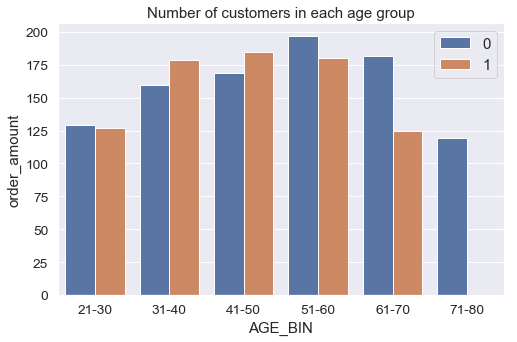

In [21]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df3['AGE_BIN'] = pd.cut(x=df3.customer_age, bins=bins, labels=names, right=True)

age_cnt = df3.AGE_BIN.value_counts()
age_0 = (df3.AGE_BIN[df3['defaulter'] == 0].value_counts())
age_1 = (df3.AGE_BIN[df3['defaulter'] == 1].value_counts())

plt.subplots(figsize=(8,5))
sns.barplot(data=df3, x='AGE_BIN', y='order_amount', hue='defaulter', ci=0)

plt.title("Number of customers in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

In [22]:
y = df3['defaulter']
X = df3[['order_amount', 'customer_credit_score', 'customer_age', 'paid_installment_1', 'paid_installment_2',
          'paid_installment_3','paid_installment_4']]
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2)

In [23]:

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_train= num_pipeline.fit_transform(X_train)

In [24]:
X_train

array([[-0.26735405, -0.61387496, -1.0443086 , ...,  0.15120636,
         0.2046046 ,  0.25086472],
       [-0.56692801, -1.70730898,  0.69866463, ...,  0.15120636,
        -4.88747555, -3.98621219],
       [-0.60190395, -1.2463515 , -0.13132262, ...,  0.15120636,
         0.2046046 ,  0.25086472],
       ...,
       [-0.64924871, -0.02427819, -0.96130987, ...,  0.15120636,
         0.2046046 ,  0.25086472],
       [-0.29475483, -0.33515648, -0.54631625, ...,  0.15120636,
         0.2046046 ,  0.25086472],
       [-0.59444716, -0.02427819, -0.7123137 , ...,  0.15120636,
         0.2046046 ,  0.25086472]])

In [25]:
X_test= num_pipeline.fit_transform(X_test)

In [26]:
log =  LogisticRegression()
log.fit(X_train,Y_train)
pred = log.predict(X_test)
accuracy = accuracy_score(Y_test, pred)

In [27]:
print(accuracy)

1.0


In [28]:
confusion_matrix(Y_test,pred)

array([[1751,    0],
       [   0,  128]], dtype=int64)

In [29]:
ranf = RandomForestClassifier(random_state = 42)
ranf.fit(X_train,Y_train)
predf = ranf.predict(X_test)
accuracy = accuracy_score(Y_test, predf)
print(accuracy)
confusion_matrix(Y_test,predf)

1.0


array([[1751,    0],
       [   0,  128]], dtype=int64)

In [30]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train, Y_train)
y_pred = MLPC.predict(X_test)
# Obtenemos valores de recall
recall_average = recall_score(Y_test, y_pred, pos_label="1")
recall_average 

1.0